# Data Formatting

In [35]:
import pandas as pd

In [36]:
tnd = pd.read_csv("data/1950-2020_all_tornadoes.csv")
tmp_avg = pd.read_csv("data/avg_monthly_tmp_1950-2020.csv")
tmp_max = pd.read_csv("data/max_monthly_tmp_1950-2020.csv")
tmp_min = pd.read_csv("data/min_monthly_tmp_1950-2020.csv")

In [8]:
tmp_avg.columns = ["Month", "AvgTmp", "AvgAnom"]
tmp_max.columns = ["Month", "MaxTmp", "MaxAnom"]
tmp_min.columns = ["Month", "MinTmp", "MinAnom"]
result = pd.merge(tmp_avg, tmp_max, on="Month")
temps = pd.merge(result, tmp_min, on="Month")
temps

,Month,AvgTmp,AvgAnom,MaxTmp,MaxAnom,MinTmp,MinAnom
0,195001,11.4,-1.9,22.9,0.5,-0.1,-4.4
1,195002,15.3,-2.5,25.8,-2.0,4.7,-3.1
2,195003,22.2,-6.8,31.6,-7.5,12.7,-6.3
3,195004,34.7,-8.3,43.8,-10.4,25.5,-6.3
4,195005,53.1,-2.0,65.5,-1.7,40.8,-2.1
...,...,...,...,...,...,...,...
847,202008,68.3,1.6,79.7,1.8,56.9,1.5
848,202009,57.3,-1.1,67.4,-2.1,47.2,-0.1
849,202010,41.3,-5.5,50.4,-6.8,32.2,-4.2
850,202011,38.6,6.2,48.1,7.5,29.1,4.8


# Exploratory Analysis
This exploratory analysis will use aggregate Wisconsin data instead of specific county level data which will be used for modeling

In [9]:
import seaborn as sns

# Tornado Counts By Year Plotted Against Yearly Temperature Measurements

In [10]:
tnd.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0


In [11]:
tnd['count'] = 1
wis = tnd[tnd['st'] == 'WI']
wis.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,count
151,147,1950,6,25,1950-06-25,19:20:00,3,WI,55,2,...,10,1,1,1,107,0,0,0,1,1
152,148,1950,6,25,1950-06-25,20:30:00,3,WI,55,3,...,10,1,1,1,99,0,0,0,0,1
153,149,1950,6,25,1950-06-25,21:00:00,3,WI,55,1,...,17,1,1,1,19,73,0,0,0,1
154,150,1950,6,25,1950-06-25,21:00:00,3,WI,55,4,...,880,1,1,1,85,0,0,0,0,1
156,152,1950,6,25,1950-06-25,23:30:00,3,WI,55,5,...,300,1,1,1,47,0,0,0,0,1


In [12]:
counts = wis.groupby('yr')['count'].count()
counts.head()

yr
1950     5
1951     5
1952     1
1953     5
1954    12
Name: count, dtype: int64

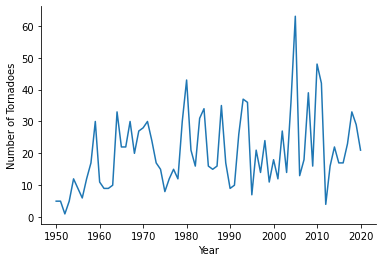

In [13]:
plot = sns.lineplot(data=counts)
plot.set(xlabel='Year', ylabel="Number of Tornadoes")
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)

<AxesSubplot:xlabel='yr', ylabel='count'>

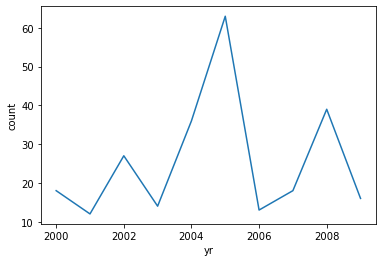

In [9]:
sns.lineplot(data=counts[50:60])

A cyclic pattern seems to be showing in the data where the number of tornadoes a year gradually rises from infrequent to infrequent before falling back down.

In [10]:
temps['Month/Year'] = temps['Month']
temps['Year'] = temps['Month'].astype(str).str[0:4].astype('int64')
temps['Month'] = temps['Month'].astype(str).str[4:].astype('int64')
temps

,Month,AvgTmp,AvgAnom,MaxTmp,MaxAnom,MinTmp,MinAnom,Month/Year,Year
0,1,11.4,-1.9,22.9,0.5,-0.1,-4.4,195001,1950
1,2,15.3,-2.5,25.8,-2.0,4.7,-3.1,195002,1950
2,3,22.2,-6.8,31.6,-7.5,12.7,-6.3,195003,1950
3,4,34.7,-8.3,43.8,-10.4,25.5,-6.3,195004,1950
4,5,53.1,-2.0,65.5,-1.7,40.8,-2.1,195005,1950
...,...,...,...,...,...,...,...,...,...
847,8,68.3,1.6,79.7,1.8,56.9,1.5,202008,2020
848,9,57.3,-1.1,67.4,-2.1,47.2,-0.1,202009,2020
849,10,41.3,-5.5,50.4,-6.8,32.2,-4.2,202010,2020
850,11,38.6,6.2,48.1,7.5,29.1,4.8,202011,2020


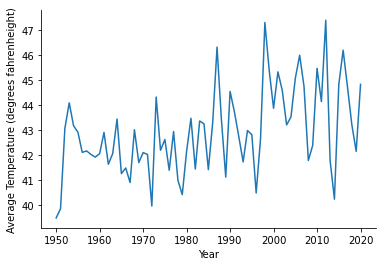

In [11]:
plot = sns.lineplot(data=temps.groupby("Year")['AvgTmp'].mean())
plot.set(xlabel='Year', ylabel="Average Temperature (degrees fahrenheight)")
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)

Yearly average temperatures appear more volotile within the last 25 years and look to have increased overall since 1950. Yearly average temperatures appear to be cyclic and go up and down through decades, similar to what was found with the tornado data.

<AxesSubplot:xlabel='Year', ylabel='MaxTmp'>

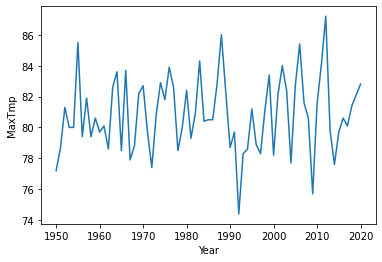

In [12]:
sns.lineplot(data=temps.groupby('Year')['MaxTmp'].max())

Yearly max temperatures appear slightly more volotile within the last 25 years. Yearly average temperatures appear to be cyclic and go up and down through decades, similar to what was found with the tornado data.

<AxesSubplot:xlabel='Year', ylabel='MinTmp'>

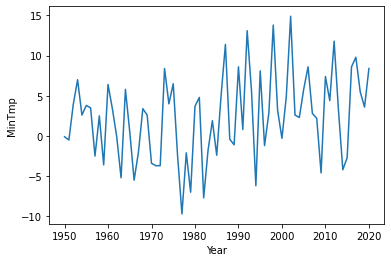

In [13]:
sns.lineplot(data=temps.groupby('Year')['MinTmp'].min())

Yearly minimum temperatures appear to have decreased from 1950 to around 1980 and have increased since then. Yearly minimum temperatures also appear to be cyclic in nature.

<AxesSubplot:>

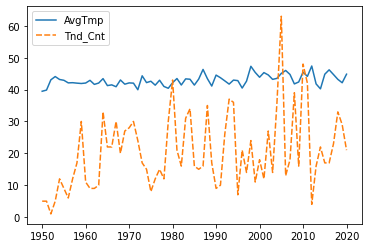

In [14]:
avgtemps = temps.groupby("Year")['AvgTmp'].mean()
frame = {'AvgTmp': avgtemps, 'Tnd_Cnt': counts}
tnd_tmp = pd.DataFrame(frame)
sns.lineplot(data=tnd_tmp)

The yearly average temperatures from 1950-2020 plotted with the number of tornadoes occurring yearly. To see anything of use I will need to normalize these values so they are on the same scale.

<AxesSubplot:ylabel='AvgTmp'>

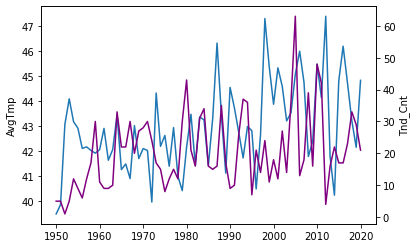

In [15]:
ax1 = sns.lineplot(data=tnd_tmp['AvgTmp'])
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=tnd_tmp['Tnd_Cnt'], color='purple')
ax1

It is difficult to determine exactly how well the number of tornadoes and yearly average temperature match up. This is where time series analysis will be helpful.

# Tornado Counts By Year Plotted Against Yearly Winter Temperature Measurements

In [17]:
winter = temps[(temps['Month'] == 1) | (temps['Month'] == 2) | (temps['Month'] == 3)]
winter

,Month,AvgTmp,AvgAnom,MaxTmp,MaxAnom,MinTmp,MinAnom,Month/Year,Year
0,1,11.4,-1.9,22.9,0.5,-0.1,-4.4,195001,1950
1,2,15.3,-2.5,25.8,-2.0,4.7,-3.1,195002,1950
2,3,22.2,-6.8,31.6,-7.5,12.7,-6.3,195003,1950
12,1,9.5,-3.8,19.5,-2.9,-0.5,-4.8,195101,1951
13,2,16.0,-1.8,26.0,-1.8,5.9,-1.9,195102,1951
...,...,...,...,...,...,...,...,...,...
829,2,13.5,-4.3,23.3,-4.5,3.6,-4.2,201902,2019
830,3,25.7,-3.3,37.0,-2.1,14.4,-4.6,201903,2019
840,1,21.5,8.2,28.7,6.3,14.4,10.1,202001,2020
841,2,19.2,1.4,30.0,2.2,8.4,0.6,202002,2020


In [18]:
winter = winter.groupby('Year').mean()
winter

,Month,AvgTmp,AvgAnom,MaxTmp,MaxAnom,MinTmp,MinAnom,Month/Year
Year,,,,,,,,
1950,2.0,16.300000,-3.733333,26.766667,-3.000000,5.766667,-4.600000,195002.0
1951,2.0,16.233333,-3.800000,25.866667,-3.900000,6.600000,-3.766667,195102.0
1952,2.0,20.133333,0.100000,29.633333,-0.133333,10.566667,0.200000,195202.0
1953,2.0,21.366667,1.333333,30.433333,0.666667,12.266667,1.900000,195302.0
1954,2.0,21.966667,1.933333,31.500000,1.733333,12.366667,2.000000,195402.0
...,...,...,...,...,...,...,...,...
2016,2.0,25.200000,5.166667,33.566667,3.800000,16.833333,6.466667,201602.0
2017,2.0,25.800000,5.766667,34.366667,4.600000,17.233333,6.866667,201702.0
2018,2.0,20.333333,0.300000,30.433333,0.666667,10.200000,-0.166667,201802.0


<AxesSubplot:xlabel='Year', ylabel='AvgTmp'>

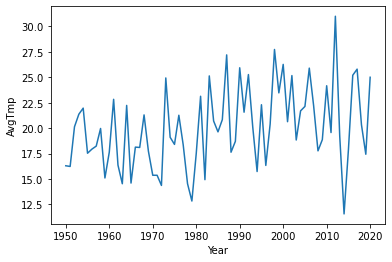

In [19]:
sns.lineplot(data=winter['AvgTmp'])

A moderate increase in winter temperatures (January-March) from 1950-2020.

<AxesSubplot:>

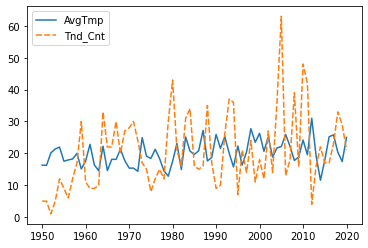

In [20]:
avgtemps = winter['AvgTmp']
frame = {'AvgTmp': avgtemps, 'Tnd_Cnt': counts}
winter_tnd = pd.DataFrame(frame)
sns.lineplot(data=winter_tnd)

<AxesSubplot:xlabel='Year', ylabel='Average Temperature (degrees fahrenheight)'>

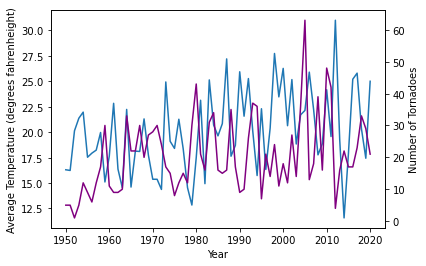

In [21]:
ax1 = sns.lineplot(data=winter_tnd['AvgTmp'])
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=winter_tnd['Tnd_Cnt'], color='purple')
ax1.set(xlabel='Year', ylabel="Average Temperature (degrees fahrenheight)")
ax2.set(ylabel='Number of Tornadoes')
ax1

There appears to be some sort of relationship here, but it is a bit shifted. This is where time series analysis will be helpful.

<AxesSubplot:ylabel='AvgTmp'>

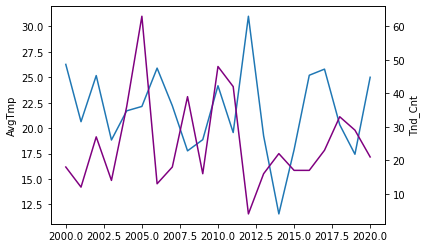

In [22]:
ax1 = sns.lineplot(data=winter_tnd['AvgTmp'][50:71])
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=winter_tnd['Tnd_Cnt'][50:71], color='purple')
ax1

# Extracting City and County From Geo Coordinates
The following requires geopy to be installed and then added to anaconda3

In [14]:
from geopy.geocoders import Nominatim
pd.options.mode.chained_assignment = None

In [15]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [20]:
start_municipality = []
end_municipality = []
start_county = []
end_county = []

for i in range(len(wis)):
    s_munic = None
    e_munic = None
    s_county = None
    e_county = None
    
    s_lat = wis['slat'].iloc[i]
    s_long = wis['slon'].iloc[i]
    e_lat = wis['elat'].iloc[i]
    e_long = wis['elon'].iloc[i]
    
    if s_lat != 0 and s_long != 0:
        start_loc = geolocator.reverse(str(s_lat)+","+str(s_long))
        addr = start_loc.raw['address']
        s_munic = addr.get('municipality')
        s_county = addr.get('county')
        
    if e_lat != 0 and e_long != 0:
        end_loc = geolocator.reverse(str(e_lat)+","+str(e_long))
        addr = end_loc.raw['address']
        e_munic = addr.get('municipality')
        e_county = addr.get('county')
        
    start_municipality.append(s_munic)
    start_county.append(s_county)
    end_municipality.append(e_munic)
    end_county.append(e_county) 

In [21]:
wis['start_municipality'] = start_municipality
wis['end_municipality'] = end_municipality
wis['start_county'] = start_county
wis['end_county'] = end_county

In [26]:
wis = wis[['yr', 'mo', 'dy', 'st', 'start_municipality', 'end_municipality', 'start_county', 'end_county', 'len', 'mag', 'inj', 'fat','slat', 'slon', 'count']]

In [27]:
wis.head()

,yr,mo,dy,st,start_municipality,end_municipality,start_county,end_county,len,mag,inj,fat,slat,slon,count
151,1950,6,25,WI,Town of Grow,None,Rusk County,None,0.5,1,0,0,45.42,-91.00,1
152,1950,6,25,WI,Town of Hackett,Town of Knox,Price County,Price County,8.4,2,0,0,45.57,-90.30,1
153,1950,6,25,WI,Town of Unity,Town of Holton,Clark County,Marathon County,7.8,2,0,1,44.83,-90.35,1
154,1950,6,25,WI,Town of Woodboro,Town of Pine Lake,Oneida County,Oneida County,13.1,4,12,2,45.58,-89.58,1
156,1950,6,25,WI,Town of Berlin,None,Green Lake County,Green Lake County,0.1,3,0,0,43.95,-88.95,1


In [25]:
wis.to_csv('data/tnd_wis_county.csv')

# Bringing In County Level Temp Data

In [104]:
tmp_avg = pd.read_csv("data/avg_monthly_tmp_1895-2022_county.csv")
tmp_max = pd.read_csv("data/max_monthly_tmp_1895-2022_county.csv")
tmp_min = pd.read_csv("data/min_monthly_tmp_1895-2022_county.csv")
precip = pd.read_csv("data/monthly_precip_1895-2022_county.csv")

In [105]:
tmp_avg = tmp_avg[['Location', 'Date', 'Value']]
tmp_max = tmp_max[['Location', 'Date', 'Value']]
tmp_min = tmp_min[['Location', 'Date', 'Value']]
precip = precip[['Location', 'Date', 'Value']]
tmp_avg.columns = ['County', 'Date', 'AvgTmp']
tmp_max.columns = ['County', 'Date', 'MaxTmp']
tmp_min.columns = ['County', 'Date', 'MinTmp']
precip.columns = ['County', 'Date', 'Precip']

In [106]:
tmp_avg['Year'] = tmp_avg['Date'].astype(str).str[0:4].astype('int64')
tmp_avg['Month'] = tmp_avg['Date'].astype(str).str[4:].astype('int64')
tmp_avg = tmp_avg[(tmp_avg['Year'] >= 1950) & (tmp_avg['Year'] <= 2020) & (tmp_avg['AvgTmp'] != -99)]

tmp_max['Year'] = tmp_max['Date'].astype(str).str[0:4].astype('int64')
tmp_max['Month'] = tmp_max['Date'].astype(str).str[4:].astype('int64')
tmp_max = tmp_max[(tmp_max['Year'] >= 1950) & (tmp_max['Year'] <= 2020) & (tmp_max['MaxTmp'] != -99)]

tmp_min['Year'] = tmp_min['Date'].astype(str).str[0:4].astype('int64')
tmp_min['Month'] = tmp_min['Date'].astype(str).str[4:].astype('int64')
tmp_min = tmp_min[(tmp_min['Year'] >= 1950) & (tmp_min['Year'] <= 2020) & (tmp_min['MinTmp'] != -99)]

precip['Year'] = precip['Date'].astype(str).str[0:4].astype('int64')
precip['Month'] = precip['Date'].astype(str).str[4:].astype('int64')
precip = precip[(precip['Year'] >= 1950) & (precip['Year'] <= 2020) & (precip['Precip'] != -99)]

In [107]:
result = pd.merge(tmp_avg, tmp_max)
county_temps = pd.merge(result, tmp_min)
county_climate = pd.merge(county_temps, precip)

In [108]:
county_climate.head()

,County,Date,AvgTmp,Year,Month,MaxTmp,MinTmp,Precip
0,Adams County,195001,14.0,1950,1,26.0,2.0,1.81
1,Adams County,195002,15.8,1950,2,26.5,5.2,1.07
2,Adams County,195003,23.2,1950,3,32.7,13.7,1.85
3,Adams County,195004,36.2,1950,4,46.3,26.0,3.09
4,Adams County,195005,55.1,1950,5,68.4,41.7,2.38


In [109]:
county_climate.to_csv('data/county_climate.csv')